# 9A. Sea Ice

<div style="text-align: right">
<p>
    <img src="https://pcmdi.github.io/assets/PCMDI/199x65px-PCMDI-Logo-Text-rectangle.png"
         width="91"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Program for Climate Model Diagnosis and Intercomparison"
         alt="Program for Climate Model Diagnosis and Intercomparison"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/LLNL/212px-LLNLiconPMS286-WHITEBACKGROUND.png"
         width="30"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Lawrence Livermore National Laboratory"
         alt="Lawrence Livermore National Laboratory"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/DOE/459x127px-DOE-Logo_Color_TextOnly.png"
         width="108"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="United States Department of Energy"
         alt="United States Department of Energy"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/ESGF2-US/390x202px-ESGF2-US_logo_transparent_word-crop.png"
         width="57"
         height="30"
         class="fixed-height-image"
         style="margin-right: 25px"
         title="Earth System Grid Federation 2 - US Consortium"
         alt="Earth System Grid Federation 2 - US Consortium"
    >
</p>
</div>

**Summary**  
The PCMDI Metrics Package (PMP) sea ice driver produces metrics that compare modeled and observed sea ice extent focusing on its annual cycle. This notebook demonstrates how to run the PMP sea ice code.

**Authors**  
Ana Ordonez, Jiwoo Lee, Paul Durack, Peter Gleckler ([PCMDI](https://pcmdi.llnl.gov/), [Lawrence Livermore National Laboratory](https://www.llnl.gov/))

**Reference**  
Ivanova, D. P., P. J. Gleckler, K. E. Taylor, P. J. Durack, and K. D. Marvel, 2016: Moving beyond the Total Sea Ice Extent in Gauging Model Biases. *J. Climate*, **29**, Pp 8965–8987, https://doi.org/10.1175/JCLI-D-16-0026.1.

**Notes**  
The installation instructions for the PMP can be found [here](http://pcmdi.github.io/pcmdi_metrics/install.html).
The documentation for the sea ice metrics can be found [here](http://pcmdi.github.io/pcmdi_metrics/metrics_sea_ice.html).

**Table of Contents**

Note: Links to the sections work best when viewing this notebook via [nbviewer](https://nbviewer.org/github/PCMDI/pcmdi_metrics/blob/main/doc/jupyter/Demo/Demo_9_seaIceExtent_ivanova.ipynb).

- [1. Demo data](Demo_9_seaIceExtent_ivanova.ipynb#data)

  * [1.1 Model output](Demo_9_seaIceExtent_ivanova.ipynb#mo)

  * [1.2 Reference dataset](Demo_9_seaIceExtent_ivanova.ipynb#ref)

- [2. Sectors](Demo_9_seaIceExtent_ivanova.ipynb#sector)

- [3. Basic Example](Demo_9_seaIceExtent_ivanova.ipynb#basic)

  * [3.1.1 Introducing the PMP parameter file](Demo_9_seaIceExtent_ivanova.ipynb#param)

  * [3.1.2 Introducing the PMP driver file](Demo_9_seaIceExtent_ivanova.ipynb#driver)

  * [3.1.2 Running the PMP sea ice demo](Demo_9_seaIceExtent_ivanova.ipynb#run)

- [4. Working with multiple realizations](Demo_9_seaIceExtent_ivanova.ipynb#multi)

- [5. Working with multiple models](Demo_9_seaIceExtent_ivanova.ipynb#mm)

- [6. Further exploration](Demo_9_seaIceExtent_ivanova.ipynb#further)

- [7. Debugging the LLNL Nimbus binder environment](Demo_9_seaIceExtent_ivanova.ipynb#debug)

## 1. Demo data <a class="anchor" id="data"></a>


### 1.1 Model output <a class="anchor" id="mo"></a>

This demo uses three CMIP6 models. The Sea-Ice Area Percentage (Ocean Grid; 'siconc') and Grid-Cell Area for Ocean Variables ('areacello') variables are needed and can be found in the following directories. In addition, six other models are available that can be added to the analyses in this demo:
```
/p/user_pub/pmp/demo/sea-ice/links_siconc
/p/user_pub/pmp/demo/sea-ice/links_area
```

In [1]:
!ls /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc

siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_185001-185912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_186001-186912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_187001-187912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_188001-188912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_189001-189912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_190001-190912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_191001-191912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_192001-192912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_193001-193912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_194001-194912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_195001-195912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_196001-196912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_197001-197912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_198001-198912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_199001-199912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_200001-200912.nc
siconc_S

In [2]:
!ls /p/user_pub/pmp/demo/sea-ice/links_area/E3SM-1-0/

areacello_Ofx_E3SM-1-0_historical_r1i1p1f1_gr.nc


### 1.2 Reference dataset <a class="anchor" id="ref"></a>

The observational dataset provided is the satellite derived sea ice concentration dataset from EUMETSAT OSI-SAF. More data information can be found at the [osi-450-a product page](https://osi-saf.eumetsat.int/products/osi-450-a). The path to this data is:
```
/p/user_pub/pmp/demo/sea-ice/EUMETSAT
```

The original data was post-processed for the PMP and the processed data can be downloaded by running [Demo_0_download_data.ipynb](Demo_0_download_data.ipynb)

In [3]:
!ls /p/user_pub/pmp/demo/sea-ice/EUMETSAT/OSI-SAF-450-a-3-0/v20231201

ice_conc_nh_ease2-250_cdr-v3p0_198801-202012.nc
ice_conc_sh_ease2-250_cdr-v3p0_198801-202012.nc


**NOTE** Further exploration of the above datasets can be found in our supplemental Jupyter notebook: [Demo_9b_seaIce_data_explore.ipynb](Demo_9b_seaIce_data_explore.ipynb)

## 2. Sectors <a class="anchor" id="sector"></a>
This code block produces maps that show the different regions used in the analysis along with the mean observed (OSI-SAF) sea ice concentration. The code to generate these figures can be found in the script [`sea_ice_sector_plots.py`](sea_ice_sector_plots.py).

Below process will take about 30 seconds.

<div align=right>
<a href=Demo_9_seaIceExtent_ivanova.ipynb#top>Go back to Top</a>
</div>

In [4]:
%%time
%%bash
python sea_ice_sector_plots.py

Creating Arctic map
Creating Antarctic map
CPU times: user 5.32 ms, sys: 5.06 ms, total: 10.4 ms
Wall time: 24.7 s


In [5]:
# To open and display one of the graphics
from IPython.display import display_png, JSON, Image

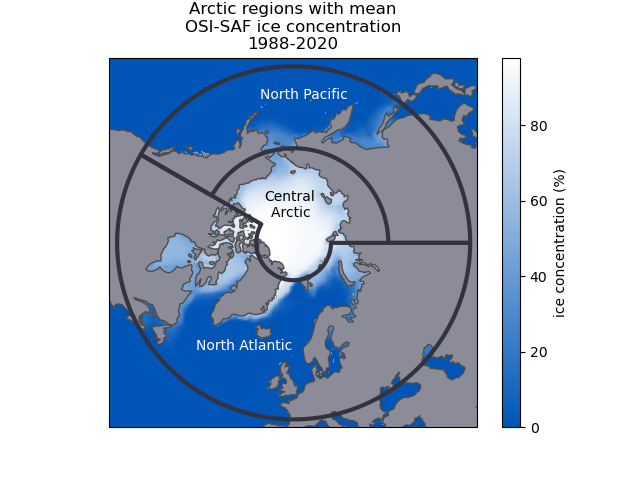

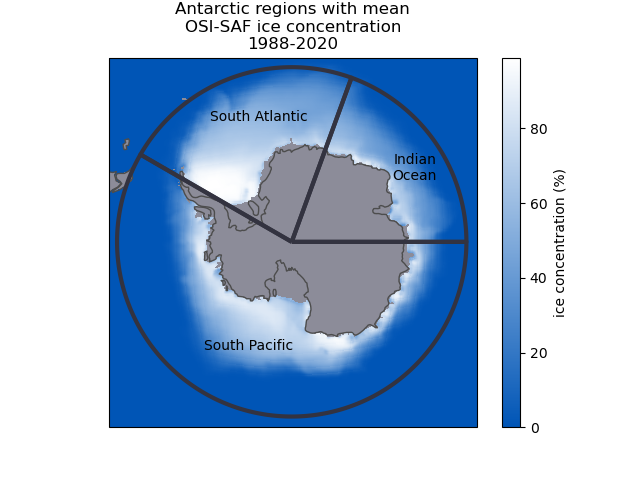

In [6]:
a = Image("Arctic_regions.png")
b = Image("Antarctic_regions.png")
display_png(a,b)

## 3. Basic example <a class="anchor" id="basic"></a>

This first case will work with sea ice concentration ouput from a single model, E3SM-1-0. Two overview plots are shown below to visualize the Arctic sea ice evolution over time in this model.

For this demo, we start the OSI-SAF satellite data in 1988 as that avoids missing data in earlier parts of the record.

The code to generate these figures can be found in  [`sea_ice_line_plots.py`](sea_ice_line_plots.py).

Below process will take about 15 seconds.

<div align=right>
<a href=Demo_9_seaIceExtent_ivanova.ipynb#top>Go back to Top</a>
</div>

In [7]:
%%time
%%bash
python sea_ice_line_plots.py

CPU times: user 4.56 ms, sys: 1.11 ms, total: 5.67 ms
Wall time: 21.1 s


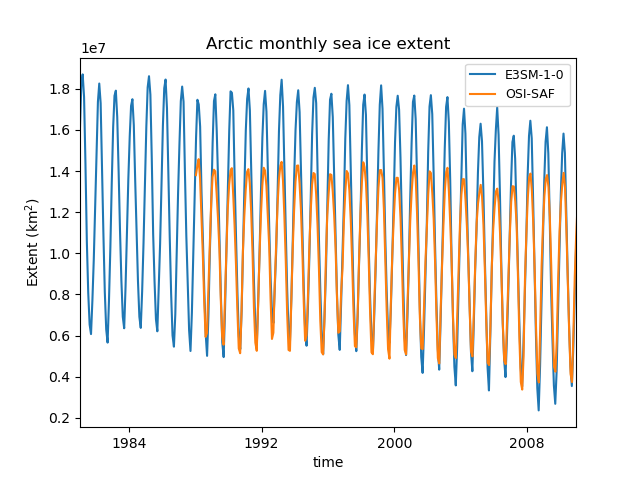

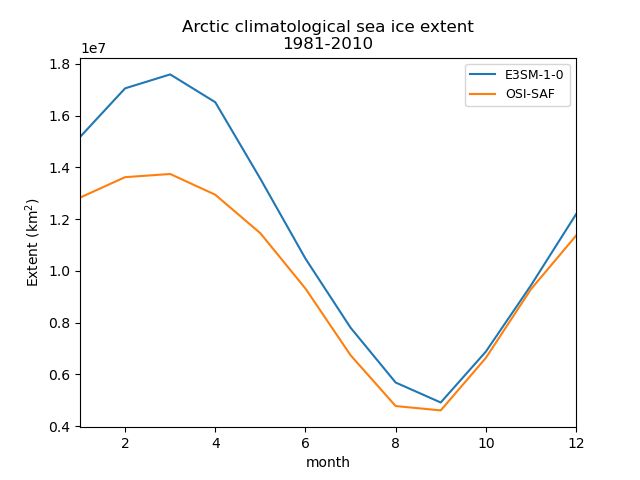

In [8]:
a = Image("Arctic_tseries.png")
b = Image("Arctic_clim.png")
display_png(a,b)

### 3.1 Introducing the PCMDI Metrics Package (PMP) parameter file <a class="anchor" id="param"></a>

The PMP drivers can all read user arguments from parameter files. We provide a demo parameter file, which is shown below. Comments (beginning with a '#') explain each of the parameters.

<div align=right>
<a href=Demo_9_seaIceExtent_ivanova.ipynb#top>Go back to Top</a>
</div>

In [9]:
with open("sea_ice_param.py") as f:
    print(f.read())

# Sea ice metrics parameter file

# Settings for models
# --------------------
# List of models to include in analysis
test_data_set = [
    "E3SM-1-0",
]

# realization can be a single realization, a list of realizations, or "*" for all realizations
realization = "r1i2p2f1"

# test_data_path is a template for the model data parent directory
test_data_path = "/p/user_pub/pmp/demo/sea-ice/links_siconc/%(model)/historical/%(realization)/siconc/"

# filename_template is a template for the model data file name
# combine it with test_data_path to get complete data path
filename_template = "siconc_SImon_%(model)_historical_%(realization)_*_*.nc"

# The name of the sea ice variable in the model data
var = "siconc"

# Start and end years for model data
msyear = 1981
meyear = 2010

# Factor for adjusting model data to decimal rather than percent units
ModUnitsAdjust = (True, "multiply", 1e-2)

# Template for the grid area file
area_template = "/p/user_pub/pmp/demo/sea-ice/links_area/%(model)/*.

To see all of the parameters available for the sea ice metrics, run the --help command as shown here:

### 3.2 Introducing the PMP driver file <a class="anchor" id="driver"></a>

<div align=right>
<a href=Demo_9_seaIceExtent_ivanova.ipynb#top>Go back to Top</a>
</div>

In [10]:
%%bash
sea_ice_driver.py --help

usage: sea_ice_driver.py [-h] [--parameters PARAMETERS]
                         [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                         [--case_id CASE_ID] [-v VAR] [--obs_var OBS_VAR]
                         [--area_var AREA_VAR] [--obs_area_var OBS_AREA_VAR]
                         [-r REFERENCE_DATA_SET [REFERENCE_DATA_SET ...]]
                         [--reference_data_path_nh REFERENCE_DATA_PATH_NH]
                         [--reference_data_path_sh REFERENCE_DATA_PATH_SH]
                         [-t TEST_DATA_SET [TEST_DATA_SET ...]]
                         [--test_data_path TEST_DATA_PATH]
                         [--realization REALIZATION]
                         [--filename_template FILENAME_TEMPLATE]
                         [--metrics_output_path METRICS_OUTPUT_PATH]
                         [--filename_output_template FILENAME_OUTPUT_TEMPLATE]
                         [--area_template AREA_TEMPLATE]
                         [--obs_area_template_nh

### 3.3 Running the PMP sea ice demo <a class="anchor" id="run"></a>
The PMP drivers are run on the command line. In this Jupyter Notebook, we use the bash cell magic function %%bash to run command line functions from the notebook.

The PMP sea ice metrics driver call follows the basic format:
sea_ice_driver.py -p parameter_file.py --additional arguments

The following cell runs the driver with the demo parameter file we saw above.

Below process will take about 3 minutes.

<div align=right>
<a href=Demo_9_seaIceExtent_ivanova.ipynb#top>Go back to Top</a>
</div>

In [11]:
%%time
%%bash
sea_ice_driver.py -p sea_ice_param.py

Model list: ['E3SM-1-0']
Find all realizations: False
OBS: Arctic
Converting units by  multiply 0.01
Writing climatology netcdf
OBS: Antarctic
Converting units by  multiply 0.01
Writing climatology netcdf
Model list: ['E3SM-1-0']
['r1i2p2f1']
/p/user_pub/pmp/demo/sea-ice/links_area/E3SM-1-0/*.nc
Converting units by  multiply 1e-06

-----------------------
model, run, variable: E3SM-1-0 r1i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_g

/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


Getting regional areas for run

-------------------------------------------
Calculating model regional average metrics 
for  E3SM-1-0
--------------------------------------------
arctic
ca
na
np
antarctic
sp
sa
io


INFO::2024-12-16 17:24::pcmdi_metrics:: Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex1/sea_ice_metrics.json
2024-12-16 17:24:04,863 [INFO]: base.py(write:422) >> Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex1/sea_ice_metrics.json
2024-12-16 17:24:04,863 [INFO]: base.py(write:422) >> Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex1/sea_ice_metrics.json
INFO::2024-12-16 17:24::pcmdi_metrics:: Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex1/sea_ice_data.json
2024-12-16 17:24:20,986 [INFO]: base.py(write:422) >> Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex1/sea_ice_data.json
2024-12-16 17:24:20,986 [INFO]: base.py(write:422) >> Results sa

Creating metrics bar chart.
Creating annual cycle figures.
Creating maps.
Cleaning up.
Deleting netcdf files.
Could not delete netcdf directory  sea_ice_demo/ex1/netcdf
[Errno 39] Directory not empty: 'sea_ice_demo/ex1/netcdf'
Writing metadata file.
CPU times: user 54.9 ms, sys: 13.1 ms, total: 68 ms
Wall time: 6min 24s


One of the primary outputs of the PMP is a JSON file containing the metrics values. In this case, the metrics are the mean square errors of the time mean and monthly mean ice extent. Ice extent is defined as the total area covered by sea ice concentration of >= 15%. The metrics are organized by model, realization, and reference dataset.

The metrics JSON from this run is displayed below.

In [12]:
with open("sea_ice_demo/ex1/sea_ice_metrics.json") as f:
    print(f.read())

{
    "DIMENSIONS": {
        "index": {
            "monthly_clim": "Monthly climatology of extent",
            "total_extent": "Sum of ice coverage where concentration > 15%"
        },
        "json_structure": [
            "region",
            "realization",
            "obs",
            "index",
            "statistic"
        ],
        "model": [
            "E3SM-1-0"
        ],
        "region": [
            "arctic",
            "ca",
            "na",
            "np",
            "antarctic",
            "io",
            "sa",
            "sp"
        ],
        "statistic": {
            "mse": "Mean Square Error (10^12 km^4)"
        }
    },
    "RESULTS": {
        "E3SM-1-0": {
            "antarctic": {
                "model_mean": {
                    "OSI-SAF": {
                        "monthly_clim": {
                            "mse": "0.3224829985071201"
                        },
                        "total_extent": {
                            "ms

This driver also outputs a bar chart that visualizes the mean square error between the model and observations. Since there is only one model and one realization in this instance, the bar chart looks very simple. The red bar indicates the mean square error for the time mean ice extent, and the blue bar indicates the mean square error for the climatological ice extent.

In [13]:
!ls {"sea_ice_demo/ex1/plot/MSE_bar_chart.png"}

sea_ice_demo/ex1/plot/MSE_bar_chart.png


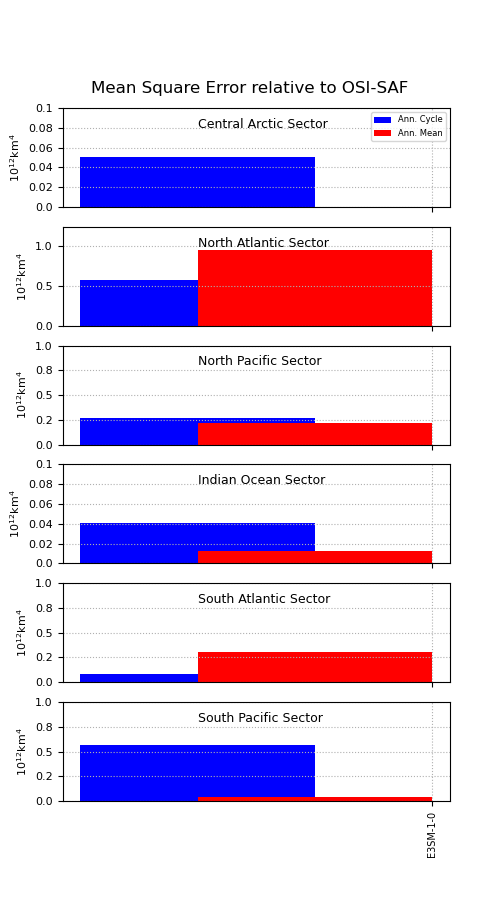

In [14]:
a = Image("sea_ice_demo/ex1/plot/MSE_bar_chart.png")
display_png(a)

## 4. Working with multiple realizations  <a class="anchor" id="multi"></a>

The sea ice driver can generate metrics based on an average of all available realizations. To do so, provide an asterisk \* as the value to the --realization argument on the command line. Options passed on the command line will supercede arguments in the parameter file. 

In addition, we set the --case_id value to 'ex2' to save results in a new directory.

Below process will take about 5 minutes.

<div align=right>
<a href=Demo_9_seaIceExtent_ivanova.ipynb#top>Go back to Top</a>
</div>

In [15]:
%%time
%%bash
sea_ice_driver.py -p sea_ice_param.py --realization '*' --case_id "ex2"

Model list: ['E3SM-1-0']
Find all realizations: True
OBS: Arctic
Converting units by  multiply 0.01
Writing climatology netcdf
OBS: Antarctic
Converting units by  multiply 0.01
Writing climatology netcdf
Model list: ['E3SM-1-0']
finding all realizations

model, runs: E3SM-1-0 ['r1i2p2f1', 'r2i2p2f1', 'r3i2p2f1', 'r4i2p2f1']
['r1i2p2f1', 'r2i2p2f1', 'r3i2p2f1', 'r4i2p2f1']
/p/user_pub/pmp/demo/sea-ice/links_area/E3SM-1-0/*.nc
Converting units by  multiply 1e-06

-----------------------
model, run, variable: E3SM-1-0 r1i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_187001-18

/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


Getting regional areas for run

-----------------------
model, run, variable: E3SM-1-0 r2i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_188001-188912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_189001-189912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_190001-190912.

/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


Getting regional areas for run

-----------------------
model, run, variable: E3SM-1-0 r3i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_188001-188912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_189001-189912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_190001-190912.

/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


Getting regional areas for run

-----------------------
model, run, variable: E3SM-1-0 r4i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_188001-188912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_189001-189912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_190001-190912.

/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


Getting regional areas for run

-------------------------------------------
Calculating model regional average metrics 
for  E3SM-1-0
--------------------------------------------
arctic
ca
na
np
antarctic
sp
sa
io


INFO::2024-12-16 17:35::pcmdi_metrics:: Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex2/sea_ice_metrics.json
2024-12-16 17:35:25,296 [INFO]: base.py(write:422) >> Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex2/sea_ice_metrics.json
2024-12-16 17:35:25,296 [INFO]: base.py(write:422) >> Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex2/sea_ice_metrics.json
INFO::2024-12-16 17:35::pcmdi_metrics:: Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex2/sea_ice_data.json
2024-12-16 17:35:41,399 [INFO]: base.py(write:422) >> Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex2/sea_ice_data.json
2024-12-16 17:35:41,399 [INFO]: base.py(write:422) >> Results sa

Creating metrics bar chart.
Creating annual cycle figures.
Creating maps.
Cleaning up.
Deleting netcdf files.
Could not delete netcdf directory  sea_ice_demo/ex2/netcdf
[Errno 39] Directory not empty: 'sea_ice_demo/ex2/netcdf'
Writing metadata file.
CPU times: user 118 ms, sys: 18.8 ms, total: 137 ms
Wall time: 16min 26s


Since we have averaged four different realizations (E3SM-1-0: 'r1i2p2f1', 'r2i2p2f1', 'r3i2p2f1', 'r4i2p2f1'), the resulting statistics are different than seen in example 1. The bar chart now contains markers showing the overall spread among the realizations.

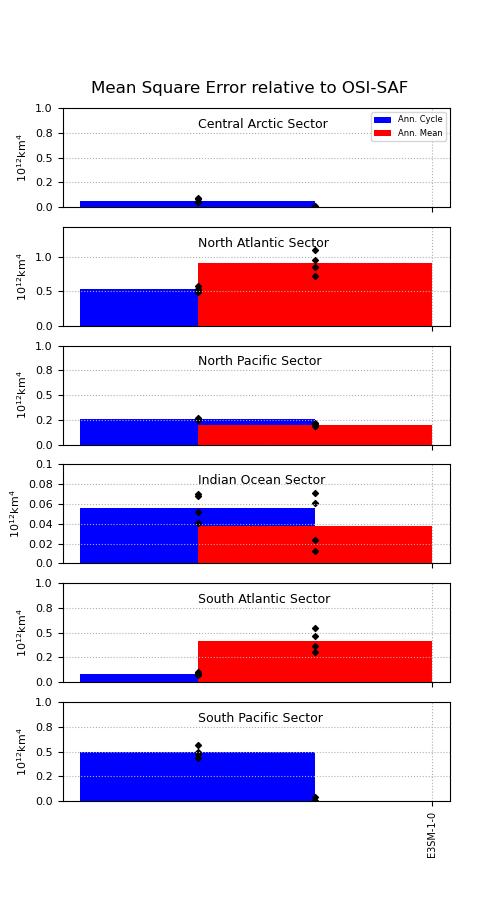

In [16]:
a = Image("sea_ice_demo/ex2/plot/MSE_bar_chart.png")
display_png(a)

## 5. Working with multiple models  <a class="anchor" id="mm"></a>

Along with using multiple realizations, we can include multiple models in a single analysis. The model data must all follow a single filename template. All model inputs must use the same name and units for the sea ice variable.

The example below shows how to use three models in the analysis, with all available realizations. The models are listed as inputs to the --test_data_set flag.

Want to add more models? Six other model sea ice datasets are available in the directories linked in the notebook introduction.

Below process will take about 30 minutes.

<div align=right>
<a href=Demo_9_seaIceExtent_ivanova.ipynb#top>Go back to Top</a>
</div>

In [21]:
%%time
%%bash
sea_ice_driver.py -p sea_ice_param.py \
--test_data_set "E3SM-1-0" "CanESM5" \
--realization '*' \
--case_id "ex3"

Model list: ['E3SM-1-0', 'CanESM5']
Find all realizations: True
OBS: Arctic
Converting units by  multiply 0.01
Writing climatology netcdf
OBS: Antarctic
Converting units by  multiply 0.01
Writing climatology netcdf
Model list: ['CanESM5', 'E3SM-1-0']
finding all realizations

model, runs: CanESM5 ['r2i1p1f1', 'r1i1p1f1', 'r3i1p1f1']
['r2i1p1f1', 'r1i1p1f1', 'r3i1p1f1']
/p/user_pub/pmp/demo/sea-ice/links_area/CanESM5/*.nc
Converting units by  multiply 1e-06

-----------------------
model, run, variable: CanESM5 r2i1p1f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/CanESM5/historical/r2i1p1f1/siconc/siconc_SImon_CanESM5_historical_r2i1p1f1_gn_185001-201412.nc
Converting units by  multiply 0.01
No land/sea mask file found for CanESM5 r2i1p1f1
Creating land/sea mask.
Writing climatology netcdf sea_ice_demo/ex3/netcdf/sic_clim_CanESM5_r2i1p1f1_1981_2010.nc


/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


Getting regional areas for run

-----------------------
model, run, variable: CanESM5 r1i1p1f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/CanESM5/historical/r1i1p1f1/siconc/siconc_SImon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc
Converting units by  multiply 0.01
No land/sea mask file found for CanESM5 r1i1p1f1
Creating land/sea mask.
Writing climatology netcdf sea_ice_demo/ex3/netcdf/sic_clim_CanESM5_r1i1p1f1_1981_2010.nc


/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


Getting regional areas for run

-----------------------
model, run, variable: CanESM5 r3i1p1f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/CanESM5/historical/r3i1p1f1/siconc/siconc_SImon_CanESM5_historical_r3i1p1f1_gn_185001-201412.nc
Converting units by  multiply 0.01
No land/sea mask file found for CanESM5 r3i1p1f1
Creating land/sea mask.
Writing climatology netcdf sea_ice_demo/ex3/netcdf/sic_clim_CanESM5_r3i1p1f1_1981_2010.nc


/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


Getting regional areas for run

-------------------------------------------
Calculating model regional average metrics 
for  CanESM5
--------------------------------------------
arctic
ca
na
np
antarctic
sp
sa
io
finding all realizations

model, runs: E3SM-1-0 ['r1i2p2f1', 'r2i2p2f1', 'r3i2p2f1', 'r4i2p2f1']
['r1i2p2f1', 'r2i2p2f1', 'r3i2p2f1', 'r4i2p2f1']
/p/user_pub/pmp/demo/sea-ice/links_area/E3SM-1-0/*.nc
Converting units by  multiply 1e-06

-----------------------
model, run, variable: E3SM-1-0 r1i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_187001-187912.nc
   /p/us

/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


Getting regional areas for run

-----------------------
model, run, variable: E3SM-1-0 r2i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_188001-188912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_189001-189912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_190001-190912.

/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


Getting regional areas for run

-----------------------
model, run, variable: E3SM-1-0 r3i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_188001-188912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_189001-189912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_190001-190912.

/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


Getting regional areas for run

-----------------------
model, run, variable: E3SM-1-0 r4i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_188001-188912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_189001-189912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_190001-190912.

/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


Getting regional areas for run

-------------------------------------------
Calculating model regional average metrics 
for  E3SM-1-0
--------------------------------------------
arctic
ca
na
np
antarctic
sp
sa
io


INFO::2024-12-16 22:03::pcmdi_metrics:: Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex3/sea_ice_metrics.json
2024-12-16 22:03:04,971 [INFO]: base.py(write:422) >> Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex3/sea_ice_metrics.json
2024-12-16 22:03:04,971 [INFO]: base.py(write:422) >> Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex3/sea_ice_metrics.json
INFO::2024-12-16 22:03::pcmdi_metrics:: Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex3/sea_ice_data.json
2024-12-16 22:03:21,529 [INFO]: base.py(write:422) >> Results saved to a json file: /home/lee1043/git/pcmdi_metrics_20241112/pcmdi_metrics/doc/jupyter/Demo/sea_ice_demo/ex3/sea_ice_data.json
2024-12-16 22:03:21,529 [INFO]: base.py(write:422) >> Results sa

Creating metrics bar chart.
Creating annual cycle figures.
Creating maps.
Cleaning up.
Deleting netcdf files.
Could not delete netcdf directory  sea_ice_demo/ex3/netcdf
[Errno 39] Directory not empty: 'sea_ice_demo/ex3/netcdf'
Writing metadata file.
CPU times: user 196 ms, sys: 30.2 ms, total: 226 ms
Wall time: 27min 46s


The output JSON now includes metrics for all three models.

In [22]:
with open("sea_ice_demo/ex3/sea_ice_metrics.json") as f:
    print(f.read())

{
    "DIMENSIONS": {
        "index": {
            "monthly_clim": "Monthly climatology of extent",
            "total_extent": "Sum of ice coverage where concentration > 15%"
        },
        "json_structure": [
            "region",
            "realization",
            "obs",
            "index",
            "statistic"
        ],
        "model": [
            "CanESM5",
            "E3SM-1-0"
        ],
        "region": [
            "arctic",
            "ca",
            "na",
            "np",
            "antarctic",
            "io",
            "sa",
            "sp"
        ],
        "statistic": {
            "mse": "Mean Square Error (10^12 km^4)"
        }
    },
    "RESULTS": {
        "CanESM5": {
            "antarctic": {
                "model_mean": {
                    "OSI-SAF": {
                        "monthly_clim": {
                            "mse": "0.2863044719173771"
                        },
                        "total_extent": {
         

Now the resulting bar chart shows three different models with their multiple realization spread.

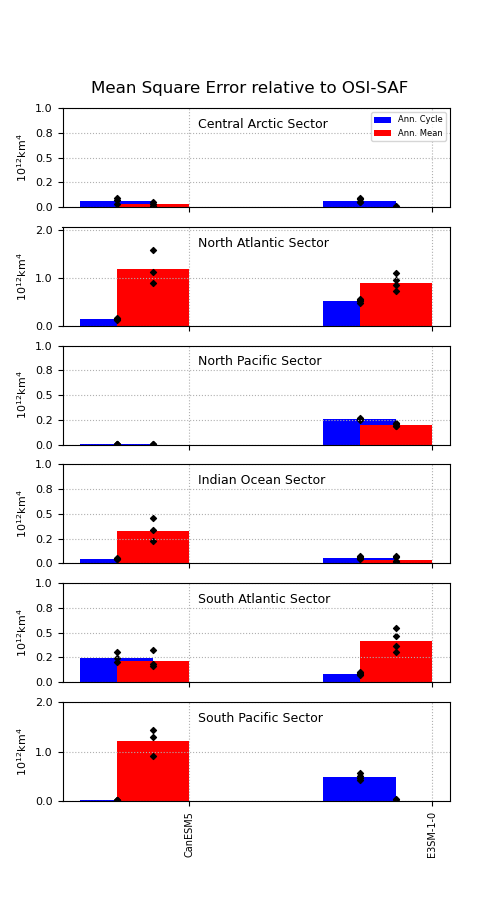

In [23]:
a = Image("sea_ice_demo/ex3/plot/MSE_bar_chart.png")
display_png(a)

## 6. Further exploration  <a class="anchor" id="further"></a>

Maybe you want to compare more models, or take a closer look at the model data? Here are links to the data for further exploration.

As a reminder, data for eight CMIP6 models (ACCESS-CM2, ACCESS-ESM1-5, CanESM5, CAS-ESM2-0, E3SM-1-0, E3SM-2-0, GFDL-ESM4, MIROC6, with 30 realizations in total across the model suite) is available here:
```
/p/user_pub/pmp/demo/sea-ice/links_siconc
/p/user_pub/pmp/demo/sea-ice/links_area
```
Note, expanding the "Working with multiple models" to include all available models will extend run time to around 15 minutes.

The observational time series can be found at:
```
/p/user_pub/pmp/demo/sea-ice/EUMETSAT
```

For some example plotting code using xcdat and matplotlib, see the scripts that were used to generate the introductory figures:

```
sea_ice_sector_plots.py
sea_ice_line_plots.py
```

Further exploration of the above datasets can be found in our supplemental Jupyter notebook: [Demo_9b_seaIce_data_explore.ipynb](Demo_9b_seaIce_data_explore.ipynb)

## 7. Debugging the LLNL Nimbus binder environment  <a class="anchor" id="debug"></a>

For CAMAS workshop users, if you hit an issue at login

```
Launching server...
Launch attempt 1 failed, retrying...
Launch attempt 2 failed, retrying...
Launch attempt 3 failed, retrying...
User $id already has a running server.
```

The fix is to login (using your GitHub credentials) using [https://binder-nimbus.llnl.gov/hub/home](https://binder-nimbus.llnl.gov/hub/home) and select "Stop My Server".

Once you refresh the start page ([https://binder-nimbus.llnl.gov](https://binder-nimbus.llnl.gov)), login and start again, it should work as expected

<div align=right>
<a href=Demo_9_seaIceExtent_ivanova.ipynb#top>Go back to Top</a>
</div>